**TP Content:**   (Breast_cancer_dataset)
1. Preprocessing
2.  Decision Tree
3.  Bagging
4.  RandomForest







In [ ]:
import pandas as pd
from sklearn.datasets import load_breast_cancer

In [ ]:
import numpy as np
np.random.seed(0)
random_state=0

In [ ]:
data = load_breast_cancer()
dataset = pd.DataFrame(data=data['data'], columns=data['feature_names'])
dataset

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
from sklearn.model_selection import train_test_split
X = dataset.copy()
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

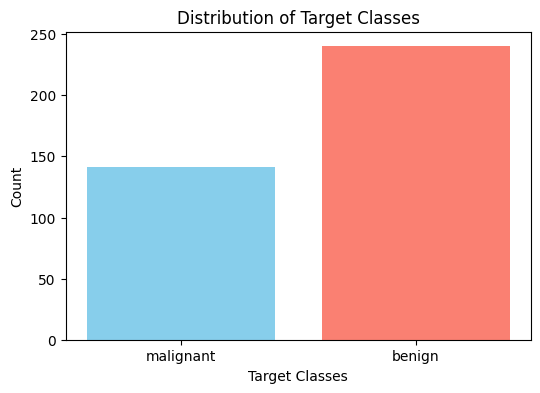

In [ ]:
unique, counts = np.unique(y_train, return_counts=True)
plt.figure(figsize=(6, 4))
plt.bar(data.target_names, counts, color=['skyblue', 'salmon'])
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Distribution of Target Classes')
plt.show()

# ***Decision Tree***

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(max_depth=4, random_state=random_state)
dt_clf = dt_clf.fit(X_train, y_train)

In [ ]:
dt_clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 4,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'best'}

In [ ]:
X_test

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
512,13.40,20.52,88.64,556.7,0.11060,0.14690,0.14450,0.08172,0.2116,0.07325,...,16.41,29.66,113.30,844.4,0.15740,0.38560,0.51060,0.20510,0.3585,0.11090
457,13.21,25.25,84.10,537.9,0.08791,0.05205,0.02772,0.02068,0.1619,0.05584,...,14.35,34.23,91.29,632.9,0.12890,0.10630,0.13900,0.06005,0.2444,0.06788
439,14.02,15.66,89.59,606.5,0.07966,0.05581,0.02087,0.02652,0.1589,0.05586,...,14.91,19.31,96.53,688.9,0.10340,0.10170,0.06260,0.08216,0.2136,0.06710
298,14.26,18.17,91.22,633.1,0.06576,0.05220,0.02475,0.01374,0.1635,0.05586,...,16.22,25.26,105.80,819.7,0.09445,0.21670,0.15650,0.07530,0.2636,0.07676
37,13.03,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.02923,0.1467,0.05863,...,13.30,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,13.61,24.98,88.05,582.7,0.09488,0.08511,0.08625,0.04489,0.1609,0.05871,...,16.99,35.27,108.60,906.5,0.12650,0.19430,0.31690,0.11840,0.2651,0.07397
336,12.99,14.23,84.08,514.3,0.09462,0.09965,0.03738,0.02098,0.1652,0.07238,...,13.72,16.91,87.38,576.0,0.11420,0.19750,0.14500,0.05850,0.2432,0.10090
299,10.51,23.09,66.85,334.2,0.10150,0.06797,0.02495,0.01875,0.1695,0.06556,...,10.93,24.22,70.10,362.7,0.11430,0.08614,0.04158,0.03125,0.2227,0.06777
347,14.76,14.74,94.87,668.7,0.08875,0.07780,0.04608,0.03528,0.1521,0.05912,...,17.27,17.93,114.20,880.8,0.12200,0.20090,0.21510,0.12510,0.3109,0.08187


In [ ]:
predictions = dt_clf.predict(X_test)
predictions

array([1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0])

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
print(classification_report(y_test, predictions, target_names=['malignant', 'benign']))

              precision    recall  f1-score   support

   malignant       0.97      0.86      0.91        71
      benign       0.92      0.98      0.95       117

    accuracy                           0.94       188
   macro avg       0.94      0.92      0.93       188
weighted avg       0.94      0.94      0.94       188



In [ ]:
dt_accuracy = accuracy_score(y_test, predictions)

In [ ]:
feature_names = X.columns
feature_names

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [ ]:
dt_clf.feature_importances_

array([0.        , 0.02513553, 0.        , 0.        , 0.        ,
       0.        , 0.0318907 , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.01954986, 0.02895613,
       0.        , 0.        , 0.01005421, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.78789177, 0.        ,
       0.        , 0.        , 0.08495455, 0.        , 0.01156725])

In [ ]:
feature_importance = pd.DataFrame(dt_clf.feature_importances_, index = feature_names).sort_values(0, ascending=False)
feature_importance

,0
worst area,0.787892
worst concave points,0.084955
mean concavity,0.031891
smoothness error,0.028956
mean texture,0.025136
area error,0.019550
worst fractal dimension,0.011567
concave points error,0.010054
worst smoothness,0.000000
worst perimeter,0.000000


<Axes: >

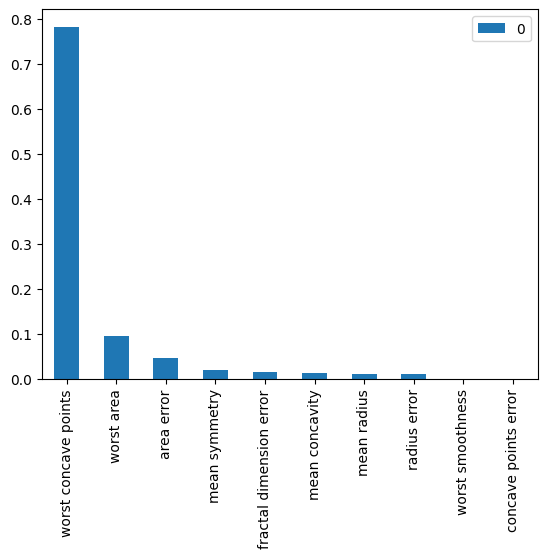

In [ ]:
feature_importance.head(10).plot(kind='bar')

[Text(0.640625, 0.9, 'worst area <= 884.55\ngini = 0.466\nsamples = 381\nvalue = [141, 240]\nclass = Benign'),
 Text(0.40625, 0.7, 'worst concave points <= 0.163\ngini = 0.139\nsamples = 253\nvalue = [19, 234]\nclass = Benign'),
 Text(0.25, 0.5, 'worst area <= 785.75\ngini = 0.072\nsamples = 241\nvalue = [9, 232]\nclass = Benign'),
 Text(0.125, 0.3, 'worst fractal dimension <= 0.057\ngini = 0.018\nsamples = 216\nvalue = [2, 214]\nclass = Benign'),
 Text(0.0625, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = Malignant'),
 Text(0.1875, 0.1, 'gini = 0.009\nsamples = 215\nvalue = [1, 214]\nclass = Benign'),
 Text(0.375, 0.3, 'smoothness error <= 0.008\ngini = 0.403\nsamples = 25\nvalue = [7, 18]\nclass = Benign'),
 Text(0.3125, 0.1, 'gini = 0.245\nsamples = 21\nvalue = [3, 18]\nclass = Benign'),
 Text(0.4375, 0.1, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]\nclass = Malignant'),
 Text(0.5625, 0.5, 'area error <= 18.095\ngini = 0.278\nsamples = 12\nvalue = [10, 2]\nclass = Malignant'),

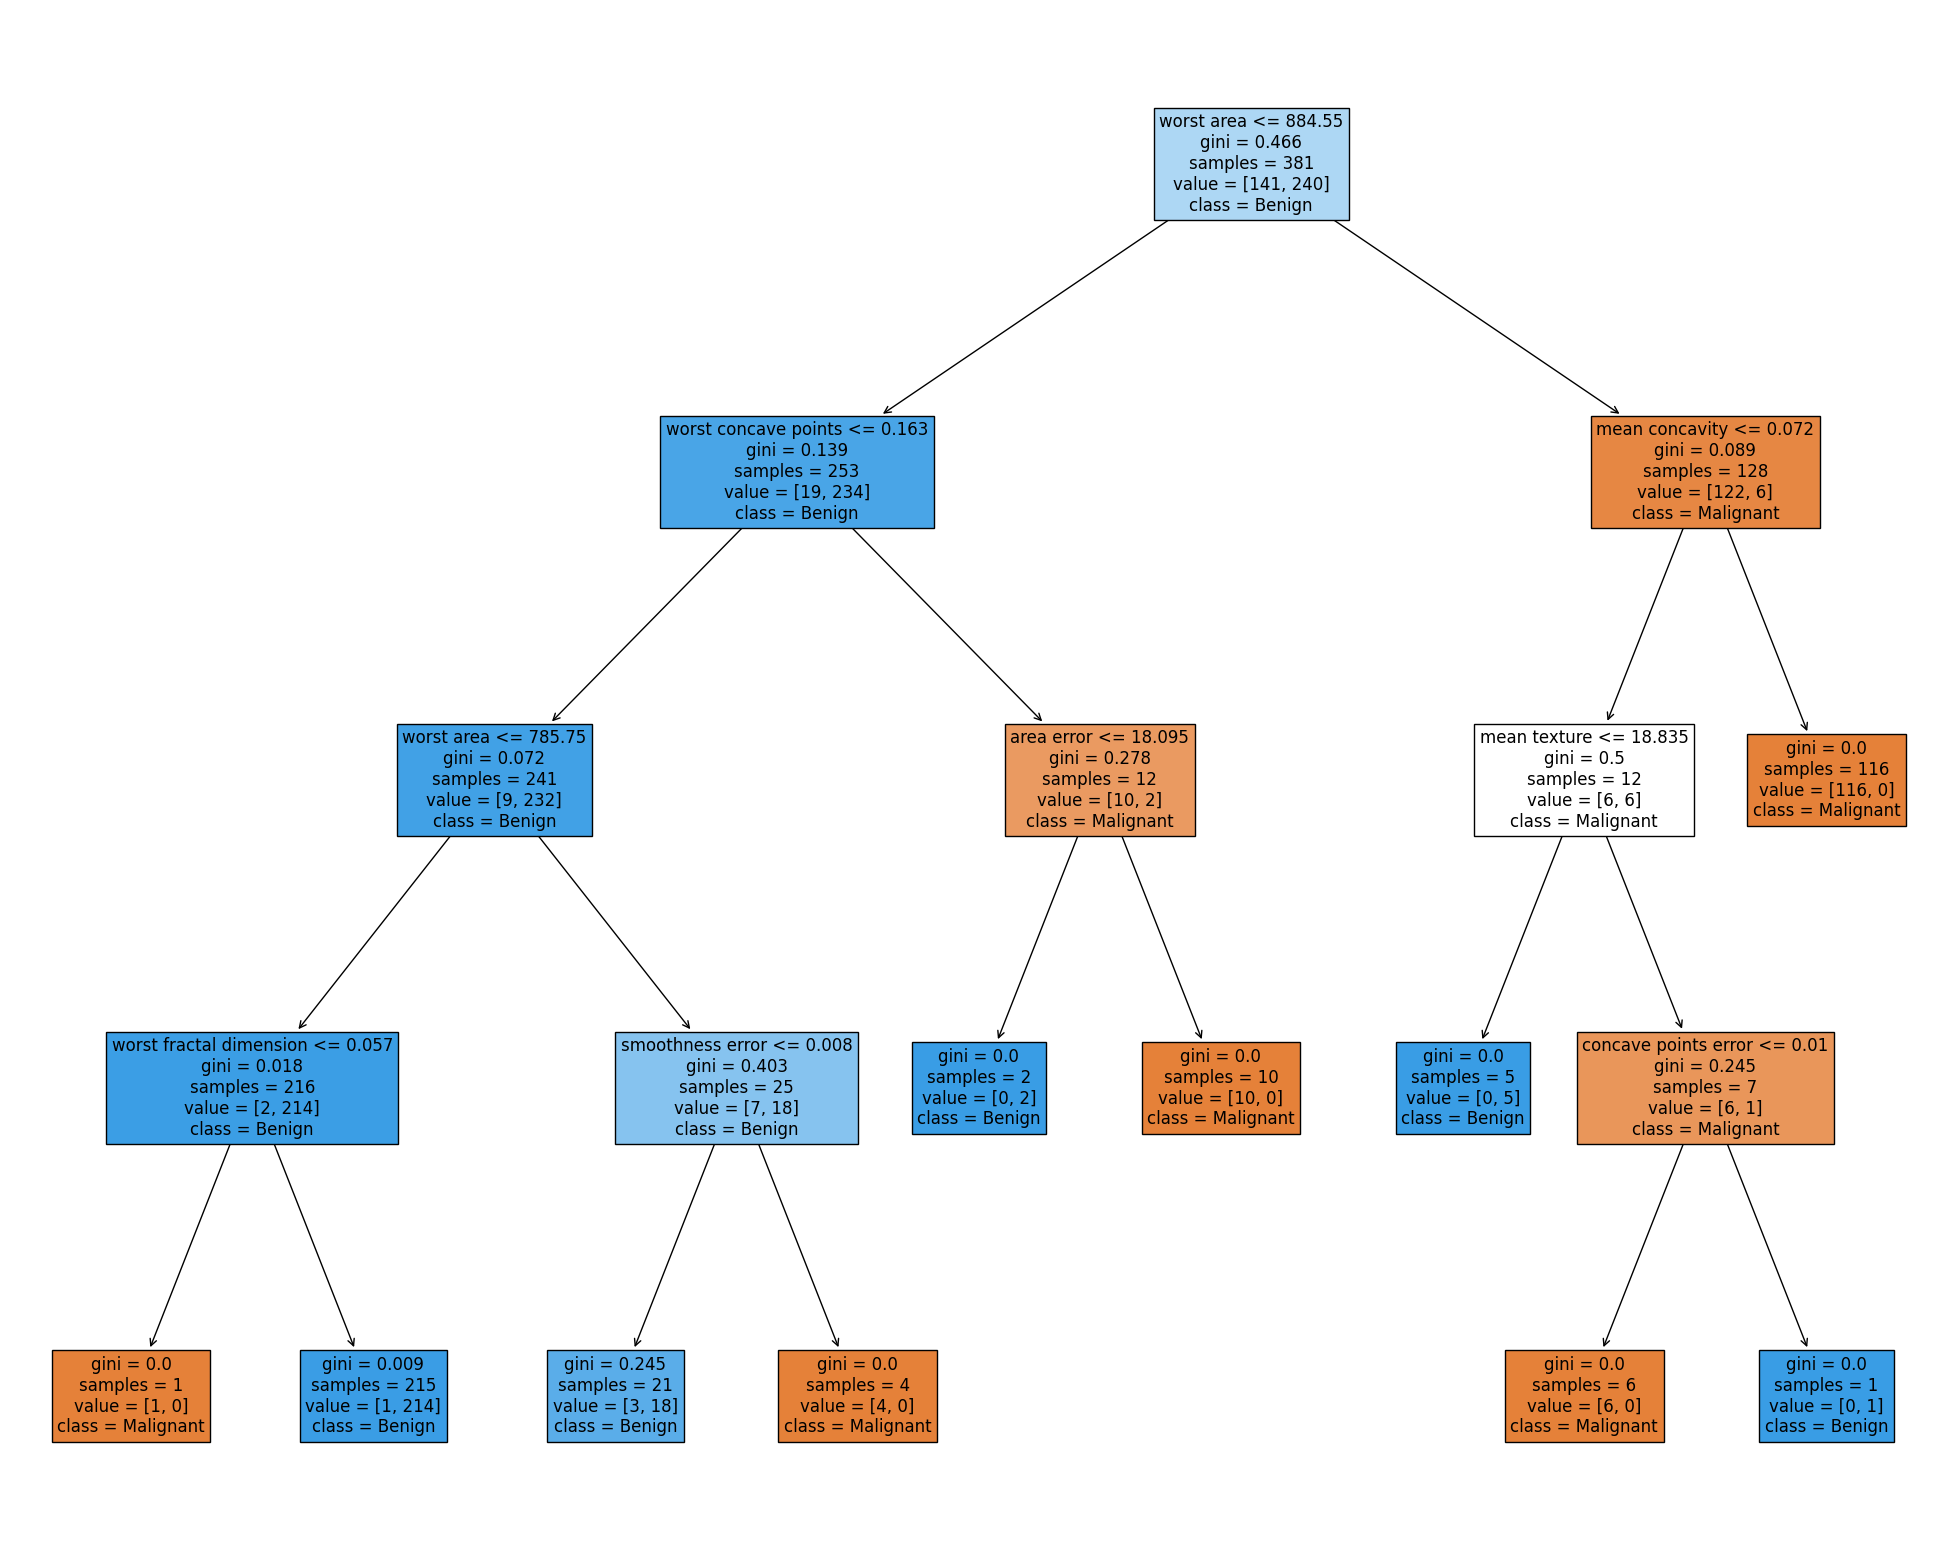

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(25,20))
tree.plot_tree(dt_clf, feature_names=feature_names, class_names={0:'Malignant', 1:'Benign'}, filled=True, fontsize=12)

# ***Bagging***

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
bagging_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=random_state), bootstrap=True)
bagging_clf.fit(X_train, y_train)
bg_predictions = bagging_clf.predict(X_test)

print(accuracy_score(y_test, bg_predictions))

0.9468085106382979


In [ ]:
print(classification_report(y_test, bg_predictions, target_names=['malignant', 'benign']))

              precision    recall  f1-score   support

   malignant       0.97      0.89      0.93        71
      benign       0.93      0.98      0.96       117

    accuracy                           0.95       188
   macro avg       0.95      0.94      0.94       188
weighted avg       0.95      0.95      0.95       188



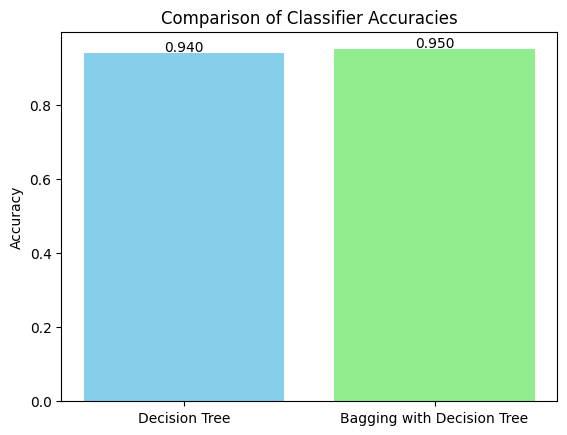

In [ ]:
labels = ['Decision Tree', 'Bagging with Decision Tree']
accuracies = [0.94, 0.95]

fig, ax = plt.subplots()
x_pos = range(len(labels))

ax.bar(x_pos, accuracies, align='center', color=['skyblue', 'lightgreen'])
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
ax.set_ylabel('Accuracy')
ax.set_title('Comparison of Classifier Accuracies')

for i, v in enumerate(accuracies):
    ax.text(i, v + 0.005, f'{v:.3f}', color='black', ha='center')

plt.show()

# ***Random Forest***

In [ ]:
rnforest_clf = RandomForestClassifier(max_leaf_nodes=10, random_state=random_state)
rnforest_clf.fit(X_train, y_train)
predictions_rf = rnforest_clf.predict(X_test)

print(accuracy_score(y_test, predictions_rf))

0.9414893617021277


In [ ]:
print(classification_report(y_test, predictions_rf, target_names=['malignant', 'benign']))

              precision    recall  f1-score   support

   malignant       0.97      0.87      0.92        71
      benign       0.93      0.98      0.95       117

    accuracy                           0.94       188
   macro avg       0.95      0.93      0.94       188
weighted avg       0.94      0.94      0.94       188



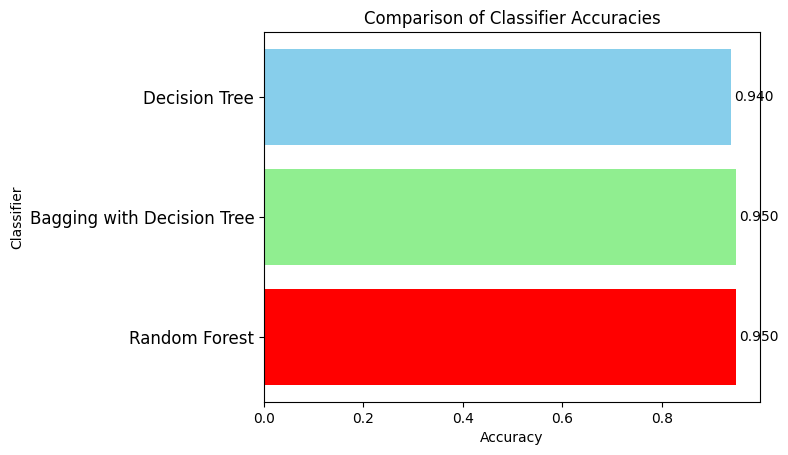

In [ ]:
labels = ['Decision Tree', 'Bagging with Decision Tree', 'Random Forest']
accuracies = [0.94, 0.95, 0.95]
fig, ax = plt.subplots()
y_pos = range(len(labels))

ax.barh(y_pos, accuracies, align='center', color=['skyblue', 'lightgreen', 'red'])
ax.set_yticks(y_pos)
ax.set_yticklabels(labels, fontsize=12)
ax.invert_yaxis()
ax.set_ylabel('Classifier')
ax.set_xlabel('Accuracy')
ax.set_title('Comparison of Classifier Accuracies')

for i, v in enumerate(accuracies):
    ax.text(v + 0.005, i, f'{v:.3f}', color='black', va='center')

plt.show()